In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

## 1.4

In [2]:
filename = 'ex1d4data.xls'
data = pd.read_excel(filename, header=None)
data.head(10)

,0,1
0,35.22,499.80
1,10.41,161.37
2,17.22,273.29
3,10.70,134.79
4,10.29,90.92
5,18.66,348.99
6,4.41,106.89
7,6.24,196.44
8,49.72,656.95
9,47.70,580.70


In [3]:
X1 = data[0].values
X2 = data[1].values

（1）均值、方差、标准差、变异系数、偏度、峰度

In [4]:
n = len(X1)
# X1
miu1 = np.mean(X1)# 均值
S1 = np.var(X1, ddof=1)# 方差
s1 = np.std(X1, ddof=1)# 标准差
cv1 =  s1/miu1# 变异系数
sk1 = stats.skew(X1)# 偏度
k1 = stats.kurtosis(X1)# 峰度

# X2
miu2 = np.mean(X2)# 均值
S2 = np.var(X2, ddof=1)# 方差
s2 = np.std(X2, ddof=1)# 标准差
cv2 =  s2/miu2# 变异系数
sk2 = stats.skew(X2)# 偏度
k2 = stats.kurtosis(X2)# 峰度

# 输出
print(f"X1、X2均值分别为{miu1:.4f}、{miu2:.4f}")
print(f"X1、X2方差分别为{S1:.4f}、{S2:.4f}")
print(f"X1、X2标准差分别为{s1:.4f}、{s2:.4f}")
print(f"X1、X2变异系数分别为{cv1:.4f}、{cv2:.4f}")
print(f"X1、X2偏度分别为{sk1:.4f}、{sk2:.4f}")
print(f"X1、X2峰度分别为{k1:.4f}、{k2:.4f}")

X1、X2均值分别为19.1665、246.1932
X1、X2方差分别为392.0308、54275.9982
X1、X2标准差分别为19.7998、232.9721
X1、X2变异系数分别为1.0330、0.9463
X1、X2偏度分别为2.3920、1.8220
X1、X2峰度分别为6.8050、3.5217


（2）中位数、上、下四分位数、四分位极差

In [5]:
# X1
m1 = np.quantile(X1, 0.5, interpolation='midpoint')# 中位数
Q1_1 = np.quantile(X1, 0.25, interpolation='midpoint')# 下四分位数
Q3_1 = np.quantile(X1, 0.75, interpolation='midpoint')# 上四分位数
R1_1 = Q3_1 - Q1_1# 四分位极差

# X2
m2 = np.quantile(X2, 0.5, interpolation='midpoint')
Q1_2 = np.quantile(X2, 0.25, interpolation='midpoint')
Q3_2 = np.quantile(X2, 0.75, interpolation='midpoint')
R1_2 = Q3_2 - Q3_1

# 输出
print(f"X1、X2中位数分别为{m1:.4f}、{m2:.4f}")
print(f"X1、X2下四分位数分别为{Q1_1:.4f}、{Q1_2:.4f}")
print(f"X1、X2上四分位数分别为{Q3_1:.4f}、{Q3_2:.4f}")
print(f"X1、X2四分位极差分别为{R1_1:.4f}、{R1_2:.4f}")

X1、X2中位数分别为14.7700、179.4100
X1、X2下四分位数分别为8.2650、105.3500
X1、X2上四分位数分别为20.0800、270.7450
X1、X2四分位极差分别为11.8150、250.6650


（3）作出直方图

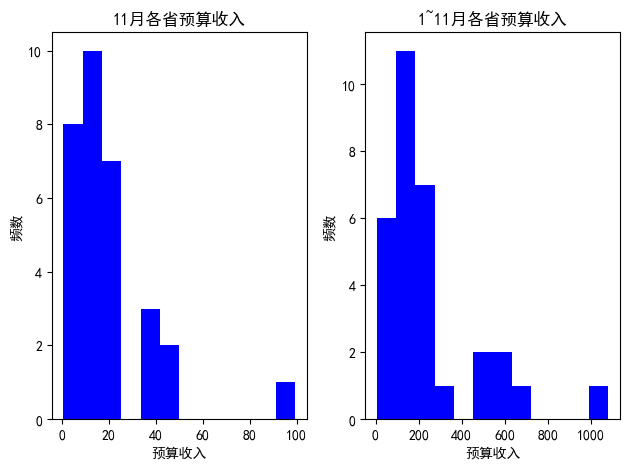

In [6]:
bins = 12 
plt.subplot(1, 2, 1)
plt.hist(X1, bins = bins, color='blue')
plt.ylabel('频数')
plt.xlabel('预算收入')
plt.title('11月各省预算收入')
plt.subplot(1, 2, 2)
plt.hist(X2, bins = bins, color='blue')
plt.ylabel('频数')
plt.xlabel('预算收入')
plt.title('1~11月各省预算收入')

plt.tight_layout()
plt.show()

（4）经验分布函数图像

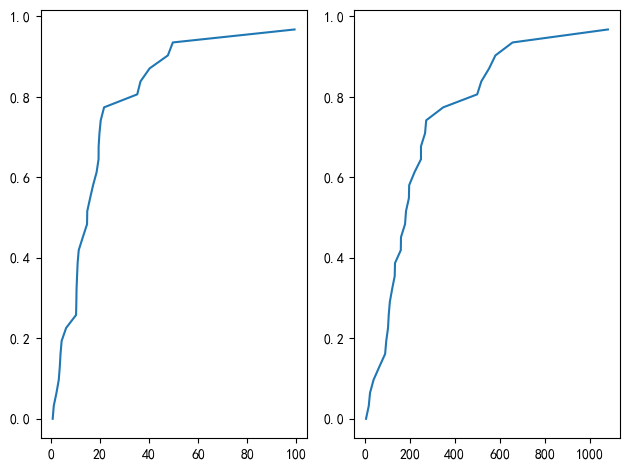

In [7]:
x1 = sorted(X1)
x2 = sorted(X2)
n = len(x1)
X_1 = []
X_2 = []

Y_1 = []
Y_2 = []

X_1.append(x1[0])
X_2.append(x2[0])
Y_1.append(0)
Y_2.append(0)
for i in range(1, n):
    X_1.append(x1[i-1])
    X_2.append(x2[i-1])
    Y_1.append((i-1)/n)
    Y_2.append((i-1)/n)
    
    X_1.append(x1[i])
    X_2.append(x2[i])
    Y_1.append(i/n)
    Y_2.append(i/n)
plt.subplot(1, 2, 1)
plt.plot(X_1, Y_1)
plt.subplot(1, 2, 2)
plt.plot(X_2, Y_2)

plt.tight_layout()
plt.show()

（5）Pearson、Spearman相关系数

In [8]:
r1 = stats.pearsonr(X1, X2)# Pearson相关系数
r2 = stats.spearmanr(X1, X2)# Spearman相关系数
print("X1，X2：%.4f, %.4f（Pearson相关系数）"%r1)
print("X1，X2：%.4f, %.4f（Spearman相关系数）"%r2)

X1，X2：0.9762, 0.0000（Pearson相关系数）
X1，X2：0.9278, 0.0000（Spearman相关系数）


## 1.5

In [9]:
filename = 'ex1d5data.xls'
data = pd.read_excel(filename, header=None)
data.head(10)

,0,1,2,3
0,18.8,28.1,5.1,35.1
1,17.4,25.6,4.9,33.9
2,16.0,27.4,5.0,32.2
3,19.3,29.5,1.7,29.1
4,17.4,27.4,4.5,35.6
5,15.3,25.3,3.6,32.2
6,16.7,25.8,4.4,33.0
7,17.4,26.7,4.4,33.0
8,16.2,25.7,2.3,33.9
9,16.7,26.7,6.4,35.0


In [10]:
x1 = data[0].values
x2 = data[1].values
x3 = data[2].values
x4 = data[3].values
x1

array([18.8, 17.4, 16. , 19.3, 17.4, 15.3, 16.7, 17.4, 16.2, 16.7, 18.2,
       16.7, 18.1, 16.7, 18.1, 20.2, 20.2, 21.5, 18.8, 21.6, 21.3])

In [11]:
# 总体均值向量
miu = data.mean(axis=0).values.tolist()
print('均值向量为：', miu)

# 总体协方差矩阵
Cov = data.cov().values.tolist()
print('协方差矩阵为', Cov)
data.cov()

均值向量为： [18.219047619047622, 27.866666666666664, 4.504761904761905, 33.766666666666666]
协方差矩阵为 [[3.508619047619048, 2.707166666666668, 1.0194047619047621, 1.2656666666666656], [2.707166666666668, 3.5593333333333335, 1.138666666666667, 1.2893333333333328], [1.0194047619047621, 1.138666666666667, 1.9984761904761907, 1.7396666666666663], [1.2656666666666656, 1.2893333333333328, 1.7396666666666663, 4.032333333333332]]


,0,1,2,3
0,3.508619,2.707167,1.019405,1.265667
1,2.707167,3.559333,1.138667,1.289333
2,1.019405,1.138667,1.998476,1.739667
3,1.265667,1.289333,1.739667,4.032333


## 1.6

In [12]:
M = data.quantile().values.tolist()
print('中位数向量：', M)

中位数向量： [18.1, 27.4, 4.8, 34.1]


In [13]:
data.head(3)

,0,1,2,3
0,18.8,28.1,5.1,35.1
1,17.4,25.6,4.9,33.9
2,16.0,27.4,5.0,32.2


In [14]:
# Pearson相关矩阵R
R = data.corr(method='pearson')
print('Pearson相关矩阵R:')
print(R.values)

Pearson相关矩阵R:
[[1.         0.76605959 0.38497193 0.33649067]
 [0.76605959 1.         0.42693601 0.34033191]
 [0.38497193 0.42693601 1.         0.61282763]
 [0.33649067 0.34033191 0.61282763 1.        ]]


In [15]:
# Spearman相关矩阵Q
Q = data.corr(method='spearman')
print('Spearman相关矩阵Q:')
print(Q.values)

Spearman相关矩阵Q:
[[1.         0.78969833 0.43399147 0.43053674]
 [0.78969833 1.         0.51110778 0.48840564]
 [0.43399147 0.51110778 1.         0.69118129]
 [0.43053674 0.48840564 0.69118129 1.        ]]


In [16]:
# 对R进行显著性检验
R_p = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(i+1, data.shape[1]):
        rij = stats.pearsonr(data.iloc[:, i], data.iloc[:, j])
        R_p[i, j] = rij[1]
print(R_p)

alpha = 0.1# 取显著性水平为α=0.1
k = 0
location = []
for i in range(len(R_p)):
    for j in range(len(R_p)):
        if R_p[i, j]>alpha:
            k = k+1
            print(f'r{i}{j}')
if k!=0:
    print('以上为大于显著性水平的数')


[[0.00000000e+00 5.15283833e-05 8.48380741e-02 1.35839682e-01]
 [0.00000000e+00 0.00000000e+00 5.35790397e-02 1.31150557e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.14055792e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
r03
r13
以上为大于显著性水平的数


In [17]:
# 对Q进行显著性检验
Q_p = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(i+1, data.shape[1]):
        qij = stats.spearmanr(data.iloc[:, i], data.iloc[:, j])
        Q_p[i, j] = qij[1]
print(Q_p)

alpha = 0.1# 取显著性水平为α=0.1
k = 0
location = []
for i in range(len(Q_p)):
    for j in range(len(Q_p)):
        if Q_p[i, j]>alpha:
            k = k+1
            print(f'q{i}{j}')
if k!=0:
    print('以上为大于显著性水平的数')


[[0.00000000e+00 2.07035536e-05 4.93361598e-02 5.13801108e-02]
 [0.00000000e+00 0.00000000e+00 1.78878482e-02 2.46757038e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.21001443e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
